In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_parquet("itineraries_snappy.parquet")

In [15]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650218700,2022-04-17T14:05:00.000-04:00,BOS,ATL,Delta,DL,Boeing 757-200,9000,947,coach
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,1650227460,2022-04-17T16:31:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9120,947,coach
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,1650213180,2022-04-17T12:33:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9240,947,coach


In [16]:
# Departure in datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [17]:
#Check first date and last date
print(df['flightDate'].min())
print(df['flightDate'].max())

2022-04-17 00:00:00
2022-11-19 00:00:00


In [18]:
# Stratified on departure date
df['strata'] = df['flightDate'].dt.to_period('M')

In [19]:
# 500,000 rows
fraction = 500000 / len(df)

sampled_df = df.groupby('strata', group_keys=False).apply(
    lambda x: x.sample(frac=fraction, random_state=42)
)

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23776/303137903.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('strata', group_keys=False).apply(


In [20]:
print(f"Sample size: {len(sampled_df)}")

Sample size: 500001


In [21]:
sampled_df = pd.read_csv("/Users/casey/Documents/GitHub/AirFareCast/itineraries_sample_500.csv")

In [22]:
sampled_df.to_csv('itineraries_sample_500.csv', index=False)

In [24]:
pd.options.display.float_format = '{:.2f}'.format

# Display summary statistics
df.describe()

,flightDate,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,82138753,82138753.00,82138753.00,82138753.00,82138753.00,76044221.00
mean,2022-08-09 17:46:02.318820608,0.15,292.66,340.39,5.98,1609.90
min,2022-04-17 00:00:00,0.00,0.01,19.59,0.00,89.00
25%,2022-07-02 00:00:00,0.00,159.00,197.10,4.00,878.00
50%,2022-08-14 00:00:00,0.00,260.47,305.20,7.00,1468.00
75%,2022-09-18 00:00:00,0.00,398.14,452.09,9.00,2415.00
max,2022-11-19 00:00:00,2.00,7662.33,8260.61,10.00,7252.00
std,NaN,0.36,183.19,196.03,2.88,857.33


In [25]:
# Basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 28 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         object        
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        int64         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     int64 

In [26]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                                   legId  searchDate  \
count                           82138753    82138753   
unique                           5999739         171   
top     318ae5fe46ac6a4ed5e1ee55f5b53677  2022-07-05   
freq                                  61      747995   
mean                                 NaN         NaN   
min                                  NaN         NaN   
25%                                  NaN         NaN   
50%                                  NaN         NaN   
75%                                  NaN         NaN   
max                                  NaN         NaN   
std                                  NaN         NaN   

                           flightDate startingAirport destinationAirport  \
count                        82138753        82138753           82138753   
unique                            NaN              16                 16   
top                               NaN             LAX                LAX   
fr

In [ ]:
# Checking for any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
legId                                      0
searchDate                                 0
flightDate                                 0
startingAirport                            0
destinationAirport                         0
fareBasisCode                              0
travelDuration                             0
elapsedDays                                0
isBasicEconomy                             0
isRefundable                               0
isNonStop                                  0
baseFare                                   0
totalFare                                  0
seatsRemaining                             0
totalTravelDistance                  6094532
segmentsDepartureTimeEpochSeconds          0
segmentsDepartureTimeRaw                   0
segmentsArrivalTimeEpochSeconds            0
segmentsArrivalTimeRaw                     0
segmentsArrivalAirportCode                 0
segmentsDepartureAirportCode               0
segmentsAirlineName                   

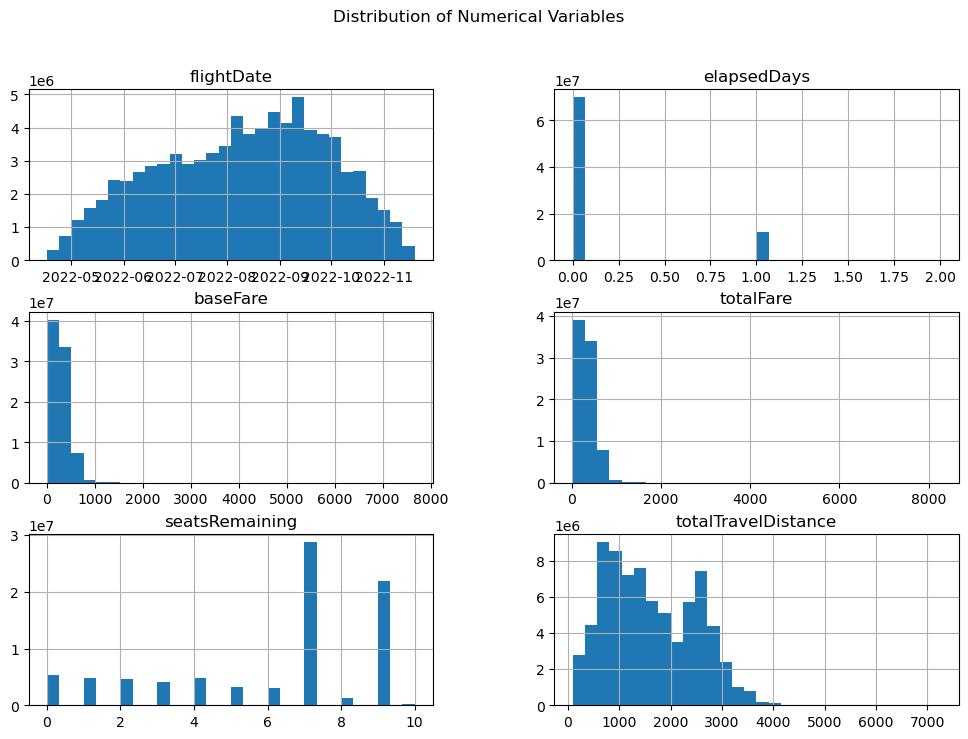

In [ ]:
# Distribution of the numerical variables
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

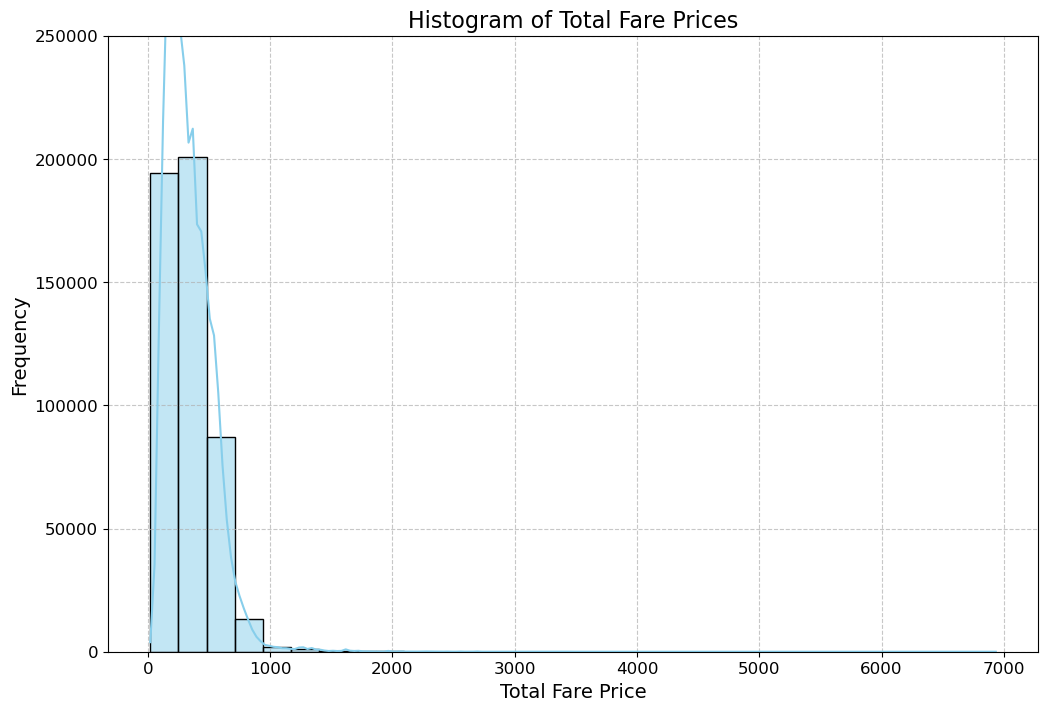

In [11]:
# Total Fare Prices
plt.figure(figsize=(12, 8))
sns.histplot(df['totalFare'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Fare Prices", fontsize=16)
plt.xlabel("Total Fare Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim(0, 250000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/2743939798.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y_tick // 60)}h' for y_tick in y_ticks])


AttributeError: 'NoneType' object has no attribute 'MonthLocator'

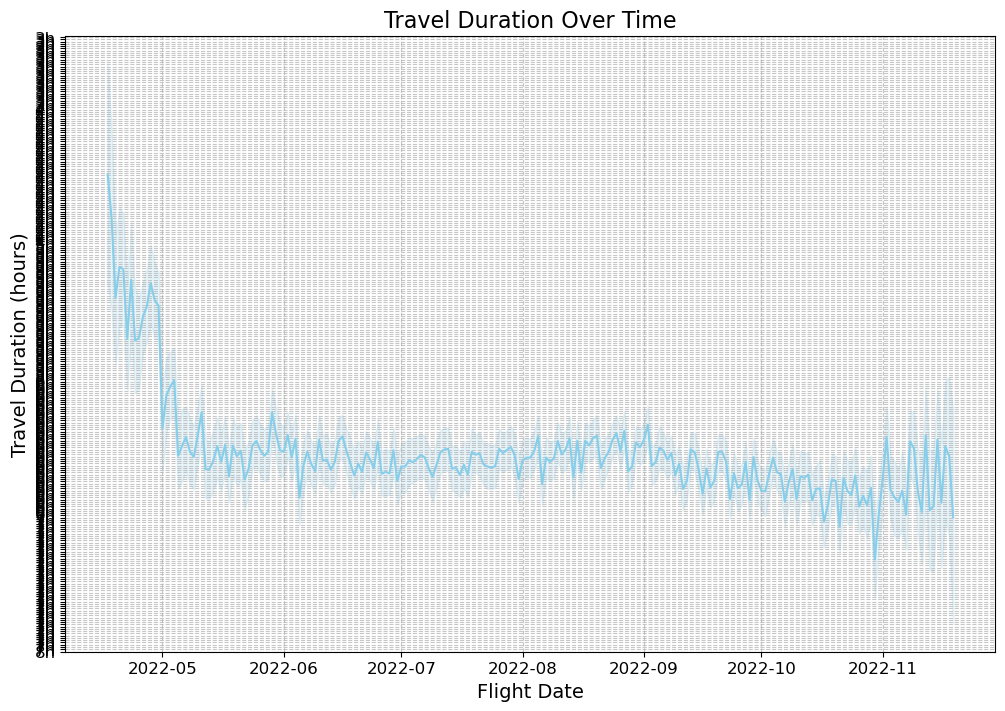

In [ ]:
# Line raph of Travel Duration
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='travelDuration', data=df, color='skyblue')
plt.title("Travel Duration Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Travel Duration (hours)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Convert travel duration from minutes to hours for the y-axis
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y_tick // 60)}h' for y_tick in y_ticks])

# Format the x-axis to show only months
mdates = pd.plotting.register_matplotlib_converters()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/1032183343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seatsRemaining', data=sampled_df, palette='viridis')


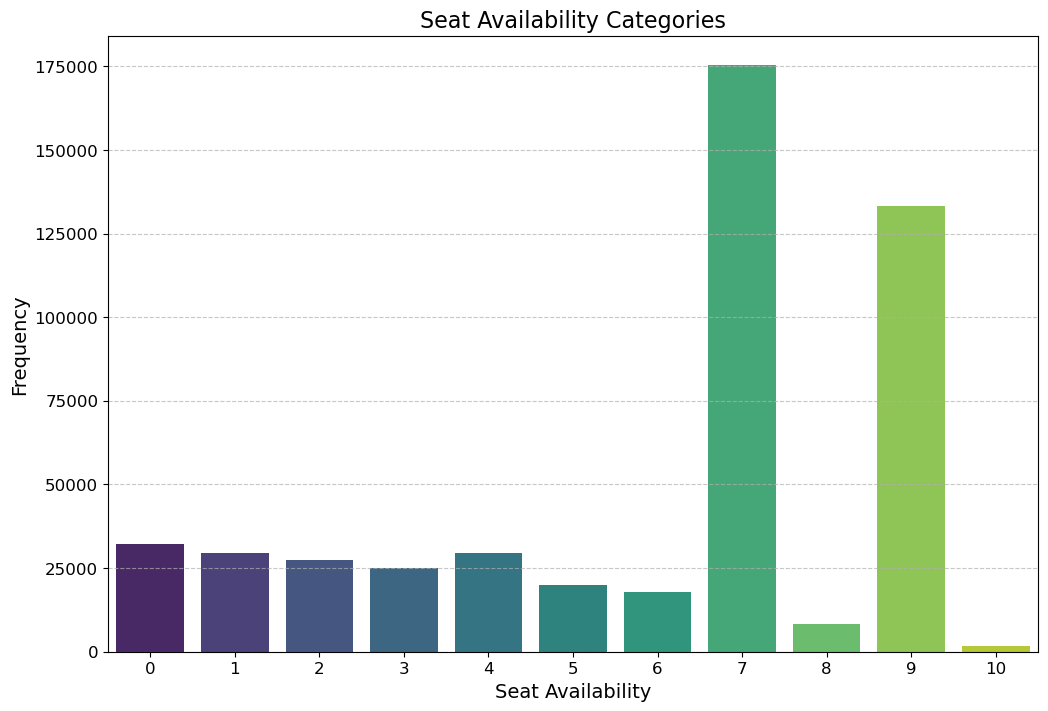

In [ ]:
# Bar Chart of Seat Availability Categories
plt.figure(figsize=(12, 8))
sns.countplot(x='seatsRemaining', data=df, palette='viridis')
plt.title("Seat Availability Categories", fontsize=16)
plt.xlabel("Seat Availability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/442144246.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


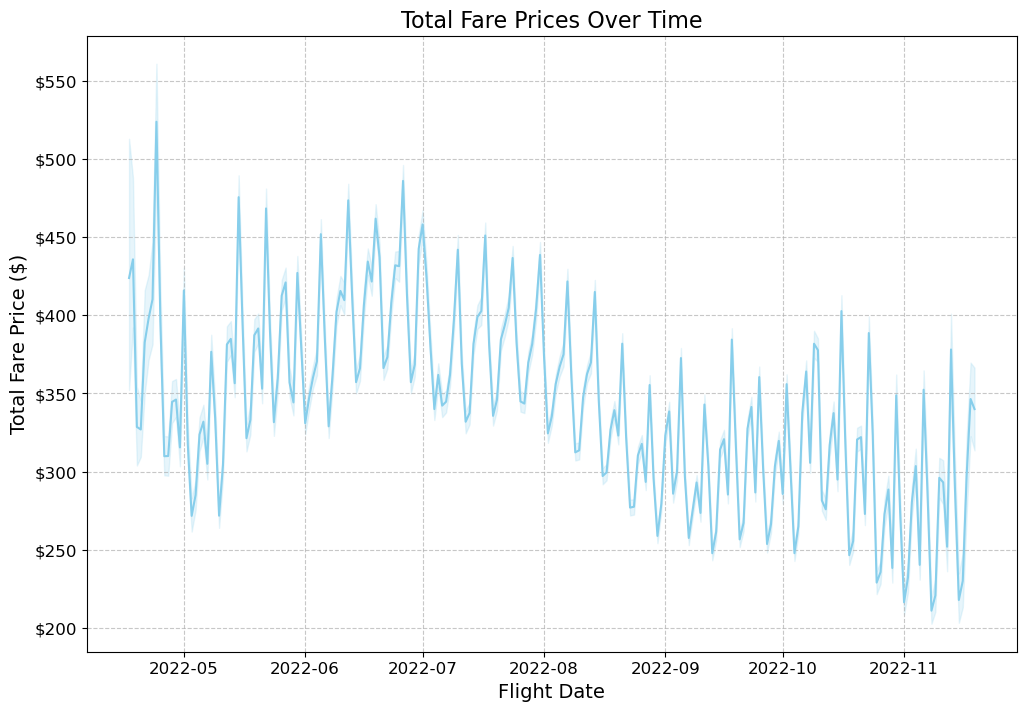

In [ ]:
# Improved Line Plot of Fare Prices Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='totalFare', data=df, color='skyblue')
plt.title("Total Fare Prices Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/3810480526.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayOfWeek', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/3810480526.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


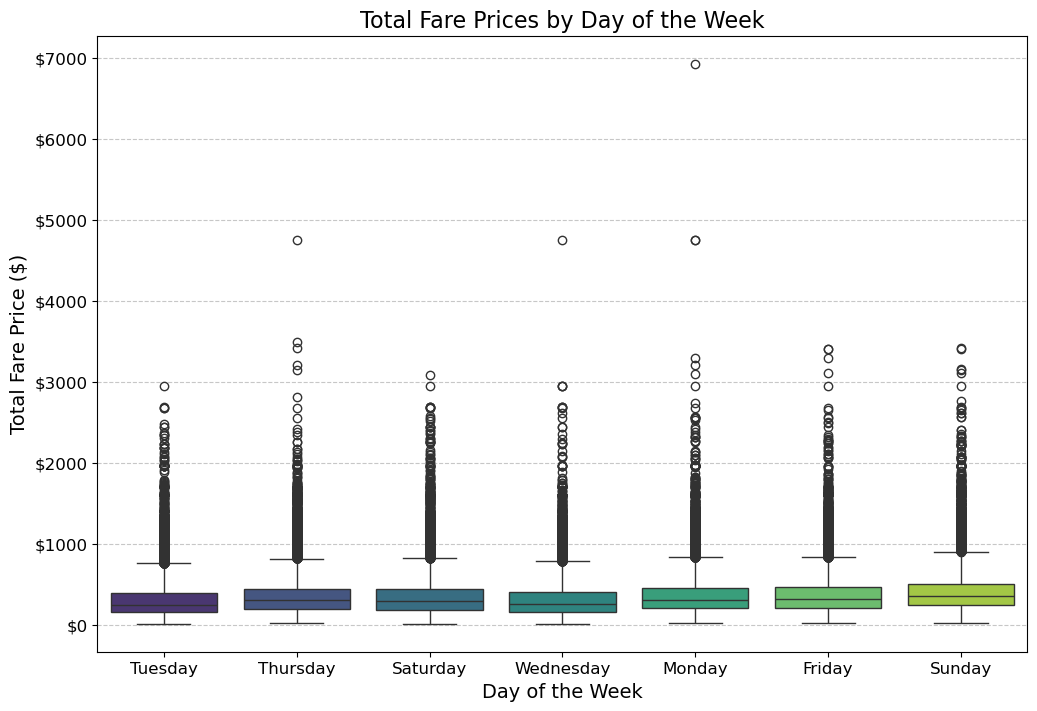

In [ ]:
# Ensure 'flightDate' is in datetime format
sampled_df['flightDate'] = pd.to_datetime(sampled_df['flightDate'])

# Create a new column 'dayOfWeek' in the dataframe
sampled_df['dayOfWeek'] = sampled_df['flightDate'].dt.day_name()

# Boxplot of Prices by Day of the Week
plt.figure(figsize=(12, 8))
sns.boxplot(x='dayOfWeek', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Total Fare Prices by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/1555976846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='strata', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/1555976846.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


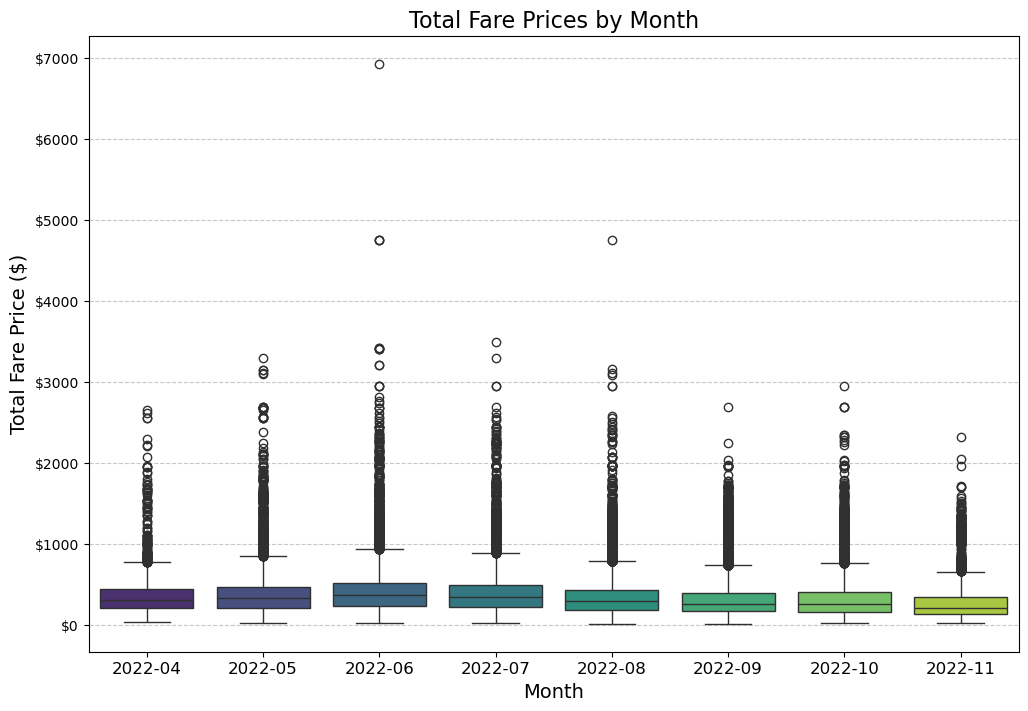

In [ ]:
# Boxplot of Prices by month
plt.figure(figsize=(12, 8))
sns.boxplot(x='strata', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Total Fare Prices by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/463081511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsAirlineName', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/463081511.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


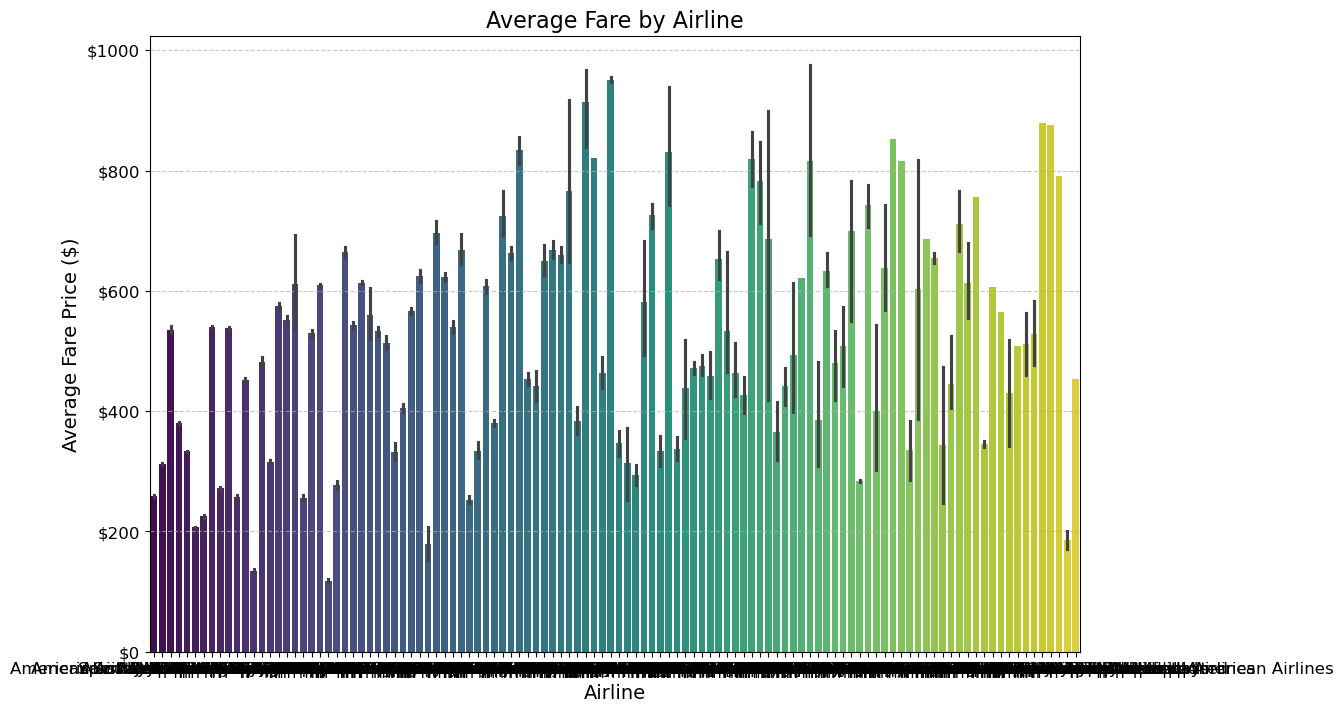

In [ ]:
# Bar Chart of Airline vs. Average Fare
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsAirlineName', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Average Fare by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/1998902150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/1998902150.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


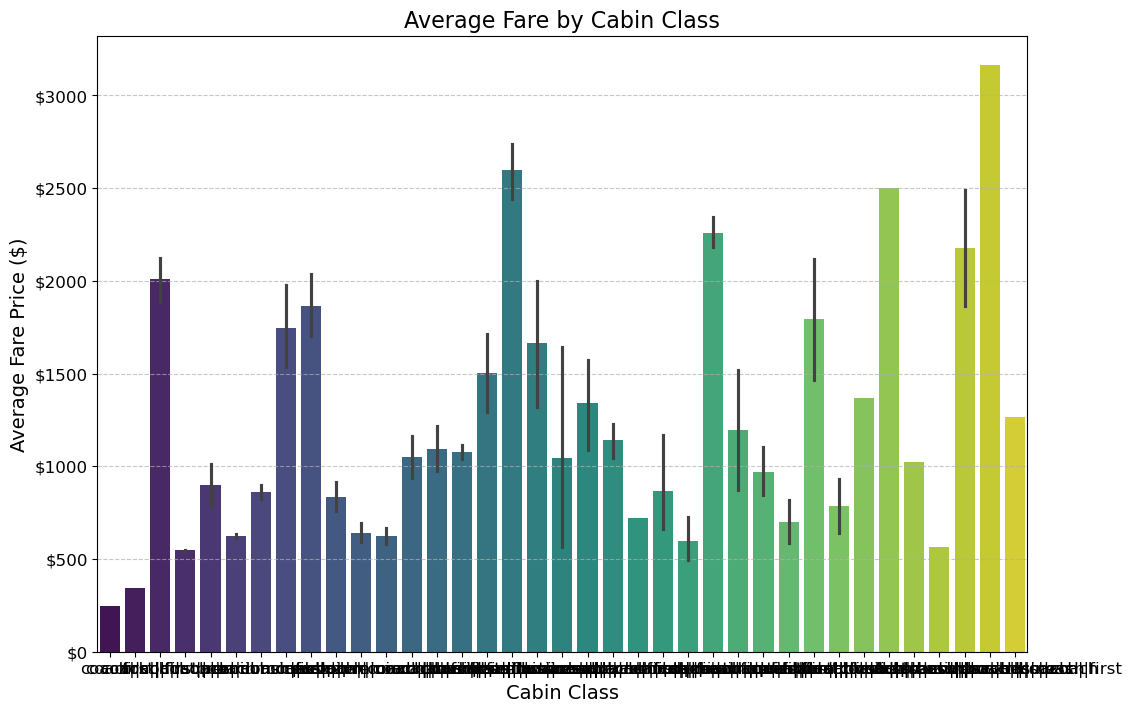

In [ ]:
# Bar Chart of Cabin Class vs. Price
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Average Fare by Cabin Class", fontsize=16)
plt.xlabel("Cabin Class", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

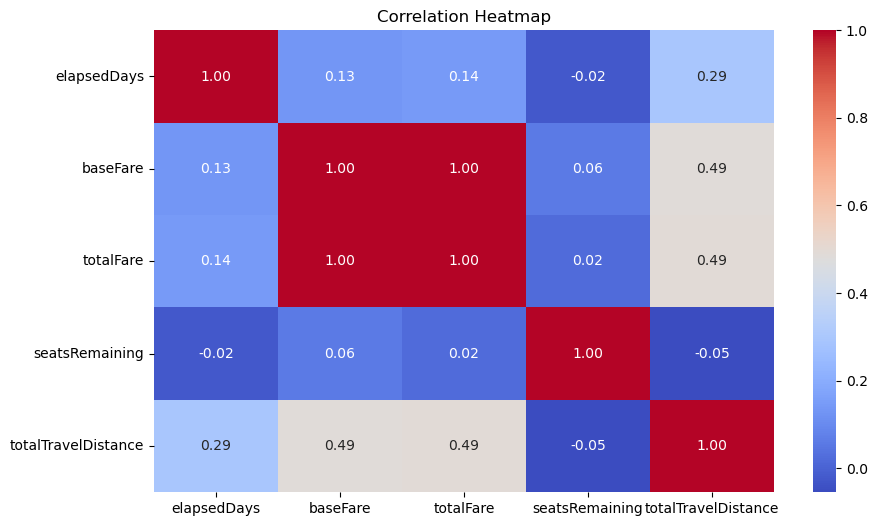

In [ ]:
# Correlations
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

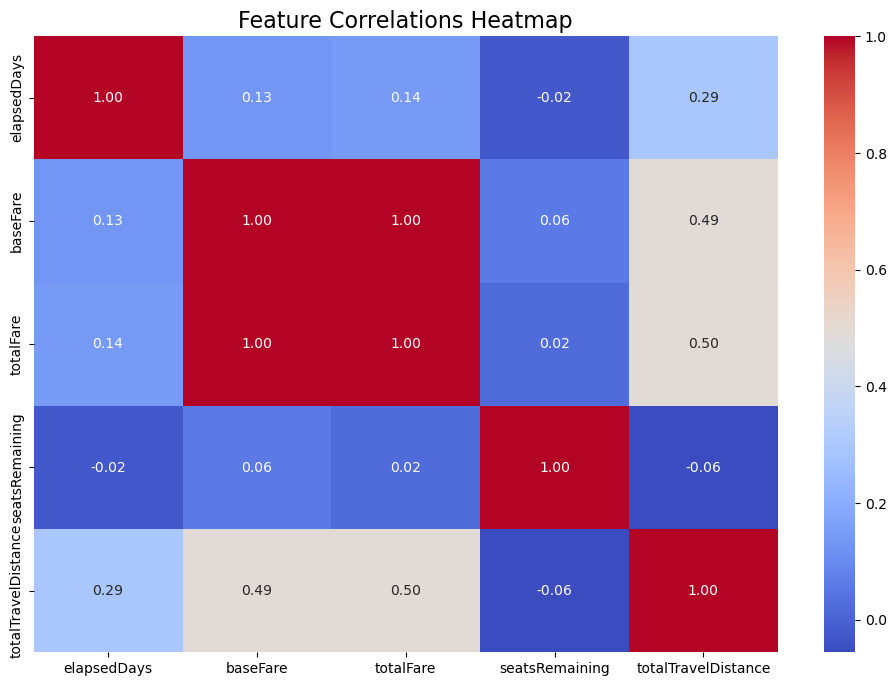

In [ ]:
# Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))
numeric_cols = sampled_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations Heatmap", fontsize=16)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/2576625433.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


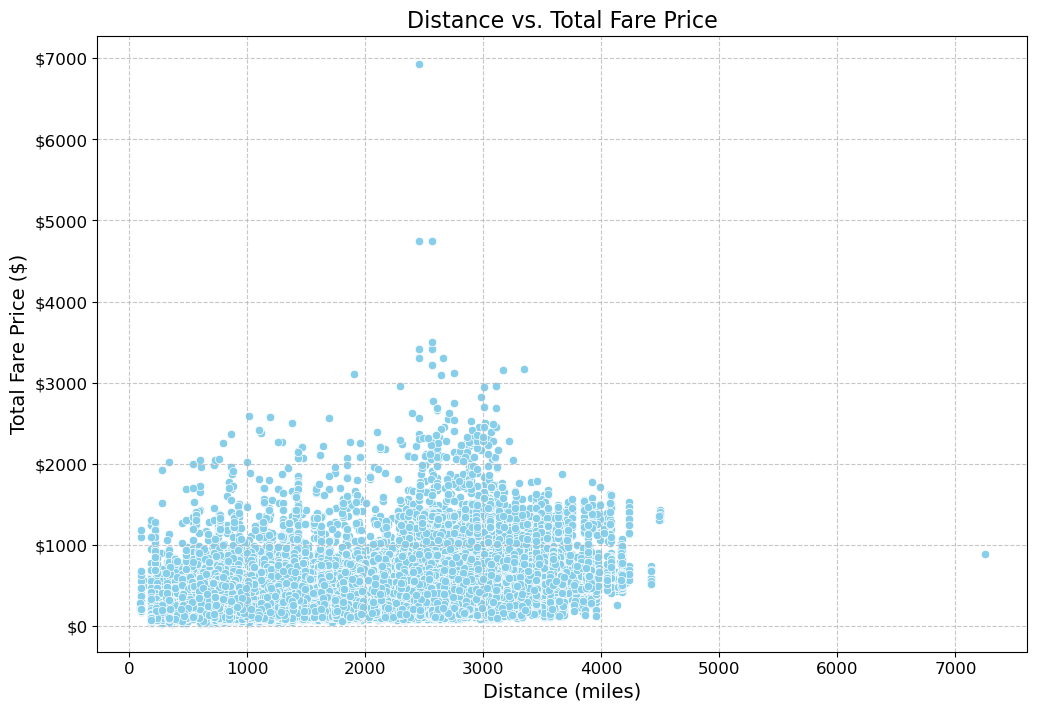

In [ ]:
# Scatter Plot of Distance vs. Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=sampled_df, color='skyblue')
plt.title("Distance vs. Total Fare Price", fontsize=16)
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

In [ ]:
# Price Distribution by Time of Day
df['departure_hour'] = pd.to_datetime(df['segmentsDepartureTimeRaw'].str.split('||').str[0]).dt.hour
plt.subplot(3, 2, 1)
avg_price_by_hour = df.groupby('departure_hour')['totalFare'].mean().dropna()
sns.lineplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values)
plt.title('Average Fare by Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

Text(0, 0.5, 'Average Fare ($)')

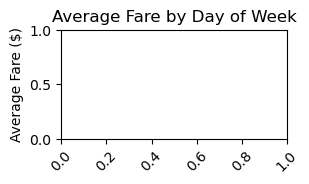

In [15]:
# Price Distribution by Day of Week
df['departure_day'] = df['segmentsDepartureTimeRaw'].str.split('||').apply(lambda x: pd.to_datetime(x[0]).day_name())
plt.subplot(3, 2, 2)
avg_price_by_day = df.groupby('departure_day')['totalFare'].mean()
sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values)
plt.title('Average Fare by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Average Fare ($)')
plt.show()

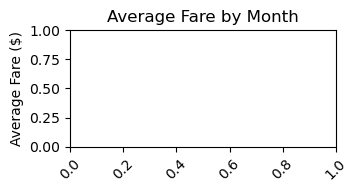

In [16]:
# Price Distribution by Month
df['departure_month'] = df['segmentsDepartureTimeRaw'].str.split('||').apply(lambda x: pd.to_datetime(x[0]).month_name())
plt.subplot(3, 2, 3)
avg_price_by_month = df.groupby('departure_month')['totalFare'].mean()
sns.barplot(x=avg_price_by_month.index, y=avg_price_by_month.values)
plt.title('Average Fare by Month')
plt.xticks(rotation=45)
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

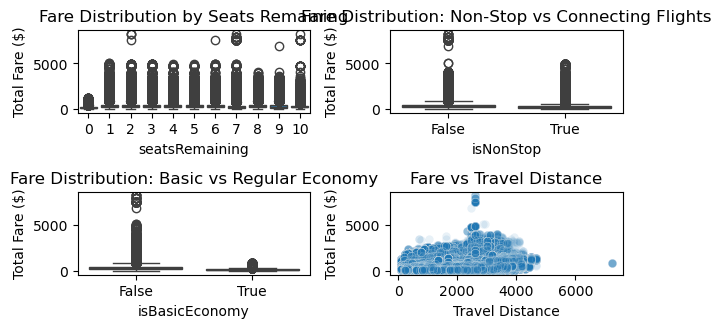

In [14]:
# Price vs Seats Remaining
plt.subplot(3, 2, 3)
sns.boxplot(x='seatsRemaining', y='totalFare', data=df)
plt.title('Fare Distribution by Seats Remaining')
plt.ylabel('Total Fare ($)')

# Non-Stop vs Connecting Flight Prices
plt.subplot(3, 2, 4)
sns.boxplot(x='isNonStop', y='totalFare', data=df)
plt.title('Fare Distribution: Non-Stop vs Connecting Flights')
plt.ylabel('Total Fare ($)')

# Basic Economy vs Regular Economy Prices
plt.subplot(3, 2, 5)
sns.boxplot(x='isBasicEconomy', y='totalFare', data=df)
plt.title('Fare Distribution: Basic vs Regular Economy')
plt.ylabel('Total Fare ($)')

# Price vs Distance
plt.subplot(3, 2, 6)
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=df, alpha=0.1)
plt.title('Fare vs Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Total Fare ($)')

plt.tight_layout()
plt.show()

In [17]:
print("Detailed Price Analysis:")

# Price statistics by flight type
nonstop_stats = df[df['isNonStop']]['totalFare'].describe()
connecting_stats = df[~df['isNonStop']]['totalFare'].describe()

print("\nNon-Stop Flight Prices:")
print(nonstop_stats)
print("\nConnecting Flight Prices:")
print(connecting_stats)

# Price variation by number of seats remaining
print("\nAverage Prices by Seats Remaining:")
print(df.groupby('seatsRemaining')['totalFare'].mean().round(2))

# Price percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
price_percentiles = df['totalFare'].quantile(percentiles)
print("\nPrice Percentiles:")
for p, value in zip(percentiles, price_percentiles):
    print(f"{int(p*100)}th percentile: ${value:.2f}")

# Price variability metrics
print("\nPrice Variability Metrics:")
print(f"Standard Deviation: ${df['totalFare'].std():.2f}")
print(f"Coefficient of Variation: {(df['totalFare'].std() / df['totalFare'].mean() * 100):.1f}%")

# Markup analysis
df['markup_percentage'] = ((df['totalFare'] - df['baseFare']) / df['baseFare'] * 100)
print("\nMarkup Analysis:")
print(f"Average Markup: {df['markup_percentage'].mean():.1f}%")
print(f"Median Markup: {df['markup_percentage'].median():.1f}%")
print(f"Maximum Markup: {df['markup_percentage'].max():.1f}%")

Detailed Price Analysis:

Non-Stop Flight Prices:
count    2.206689e+07
mean     2.511486e+02
std      1.644708e+02
min      1.959000e+01
25%      1.486000e+02
50%      2.156000e+02
75%      3.136000e+02
max      4.923600e+03
Name: totalFare, dtype: float64

Connecting Flight Prices:
count    6.007186e+07
mean     3.731677e+02
std      1.964863e+02
min      3.208000e+01
25%      2.251000e+02
50%      3.486200e+02
75%      4.886000e+02
max      8.260610e+03
Name: totalFare, dtype: float64

Average Prices by Seats Remaining:
seatsRemaining
0     206.57
1     400.88
2     393.93
3     394.01
4     343.31
5     389.03
6     389.54
7     320.74
8     408.70
9     345.47
10    325.85
Name: totalFare, dtype: float64

Price Percentiles:
10th percentile: $133.60
25th percentile: $197.10
50th percentile: $305.20
75th percentile: $452.09
90th percentile: $578.60

Price Variability Metrics:
Standard Deviation: $196.03
Coefficient of Variation: 57.6%

Markup Analysis:
Average Markup: 38.6%
Median M

The dataset contains over 82 million flight itineraries, it contains 27 columns with various flight details including pricing, routes, airlines, and booking conditions.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_75806/1579531638.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


AttributeError: 'NoneType' object has no attribute 'MonthLocator'

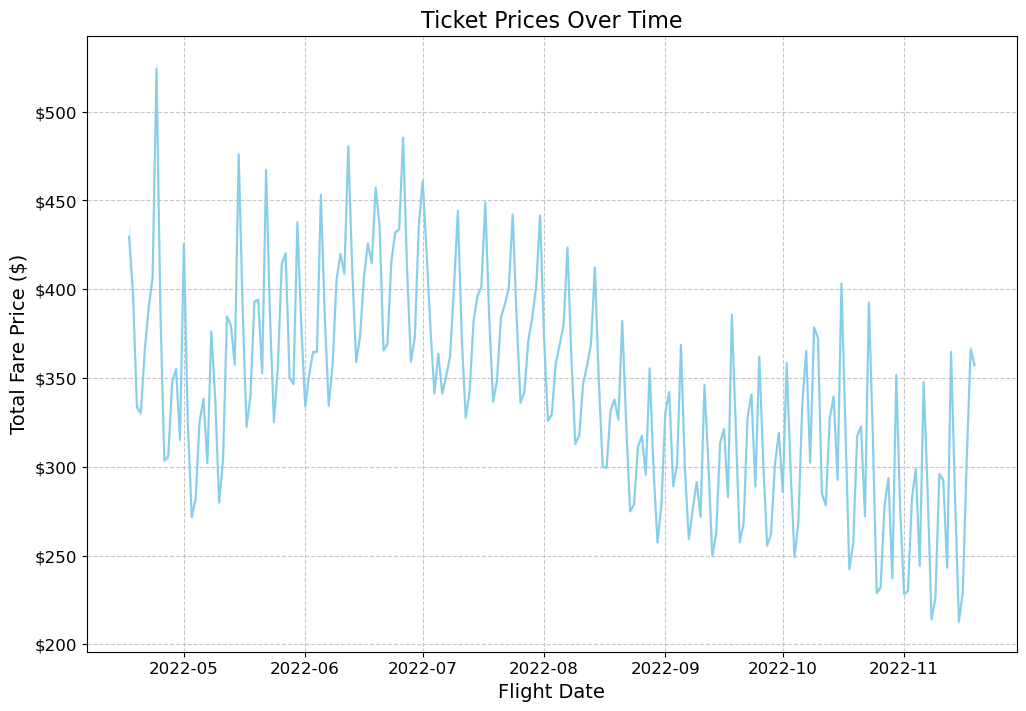

In [21]:
# Time series plot of ticket prices leading up to departure
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='totalFare', data=df, color='skyblue')
plt.title("Ticket Prices Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

# Format the x-axis to show only months
mdates = pd.plotting.register_matplotlib_converters()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


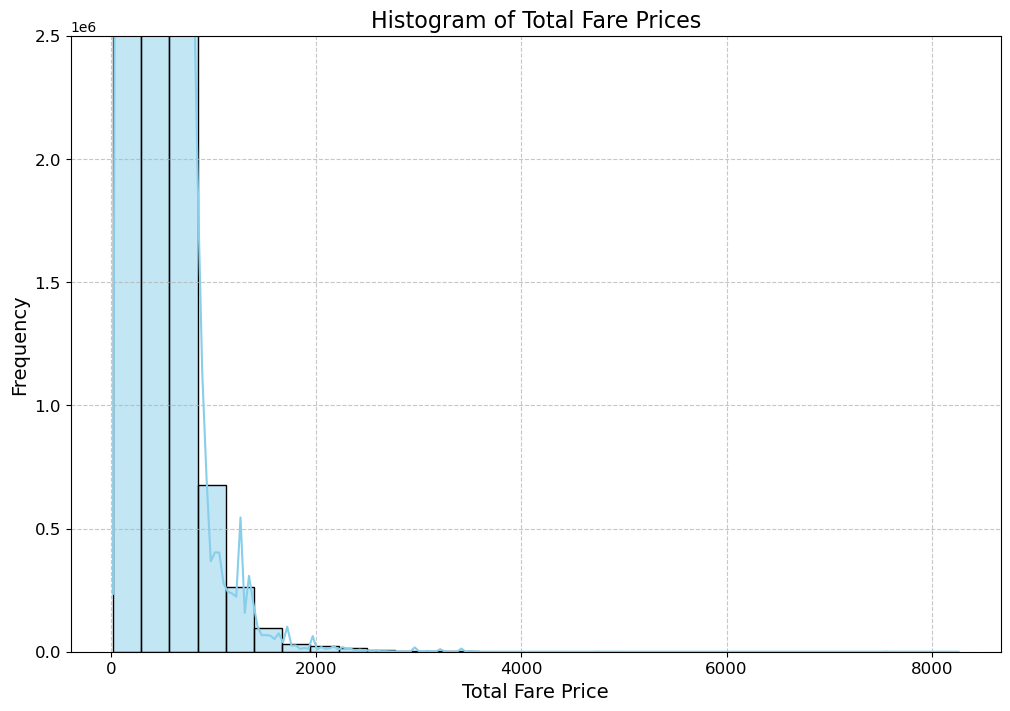

In [28]:
# Histogram of total fares to visualize price distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['totalFare'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Fare Prices", fontsize=16)
plt.xlabel("Total Fare Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim(0, 2500000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_75806/2572991911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segmentsAirlineName', y='totalFare', data=top_15_df, palette='viridis')


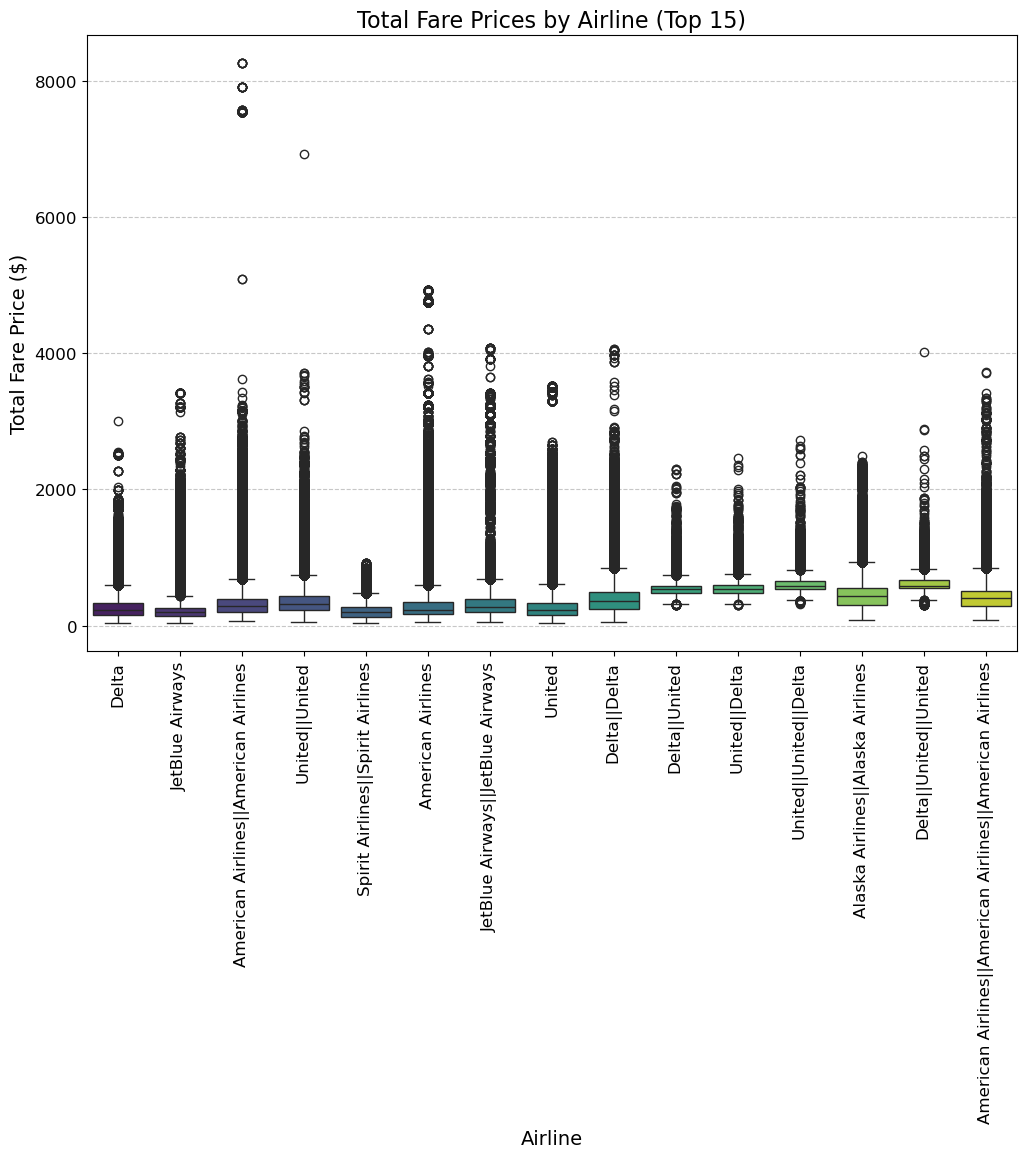

: 

In [31]:
# Boxplot of fare prices by airline to show airline-specific trends
# Get the top 15 airlines by the number of flights
top_15_airlines = df['segmentsAirlineName'].value_counts().nlargest(15).index

# Filter the dataframe to include only the top 15 airlines
top_15_df = df[df['segmentsAirlineName'].isin(top_15_airlines)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='segmentsAirlineName', y='totalFare', data=top_15_df, palette='viridis')
plt.title("Total Fare Prices by Airline (Top 15)", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()